In [99]:
# Importando biblioteca Pandas para a criação e manipulação de DataFrames.
import pandas as pd

# Importando o Numpy.
import numpy as np

# Importando modelos para a realização dos testes de treino.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Importando métricas de avaliações para os modelos.
from sklearn.metrics import confusion_matrix, f1_score

# Importando o método de validação cruzada K-Fold, pontuação do modelo e o separador de dados para treino e teste.
from sklearn.model_selection import KFold, cross_val_score,train_test_split

# Importando o método Seaborn para visualização gráfica das matrizes de confusão.
import seaborn as sn

In [100]:
# Importando dataset de dados de treino da vetorização TF:
dados_treino_tf = pd.read_csv("tweets_vetorizados_tf_novos_agrupados.csv", sep = ",", header = None)
dados_treino_tf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,NaN,11,14,20,2022,22,24,26,269,2⁰,...,voltou,voluntários,votar,votos,votou,vídeo,xandão,youtu,índios,Cluster
1,0.0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,negative
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,3.0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,negative


In [101]:
# Separação dos dados:
dados_treino_tf.columns = [dados_treino_tf.loc[0]]
dados_treino_tf = dados_treino_tf.drop(dados_treino_tf.index [[0]])
dados_treino_tf.head(5)

,NaN,11,14,20,2022,22,24,26,269,2⁰,...,voltou,voluntários,votar,votos,votou,vídeo,xandão,youtu,índios,Cluster
1,0.0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,negative
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,3.0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,negative
5,4.0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,negative


In [102]:
# Importando dataset de dados de treino da vetorização IDF:
dados_treino_idf = pd.read_csv("tweets_vetorizados_idf_novos_agrupados.csv", sep = ",", header = None)
dados_treino_idf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,NaN,11.0,14.000000,20.000000,2022.0,22.000000,24.0,26.0,269.000000,2⁰,...,voltou,voluntários,votar,votos,votou,vídeo,xandão,youtu,índios,Cluster
1,0.0,NaN,NaN,0.281786,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2817858340273836,NaN,0.2817858340273836,NaN,0.2817858340273836,NaN,NaN,NaN,NaN,negative
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
4,3.0,NaN,0.188782,NaN,NaN,0.090386,NaN,NaN,0.188782,NaN,...,NaN,0.1887824589501638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative


In [103]:
# Separação dos dados:
dados_treino_idf.columns = [dados_treino_idf.loc[0]]
dados_treino_idf = dados_treino_idf.drop(dados_treino_idf.index [[0]])
dados_treino_idf.head(5)

,NaN,11.0,14.0,20.0,2022.0,22.0,24.0,26.0,269.0,2⁰,...,voltou,voluntários,votar,votos,votou,vídeo,xandão,youtu,índios,Cluster
1,0.0,NaN,NaN,0.281786,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2817858340273836,NaN,0.2817858340273836,NaN,0.2817858340273836,NaN,NaN,NaN,NaN,negative
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
4,3.0,NaN,0.188782,NaN,NaN,0.090386,NaN,NaN,0.188782,NaN,...,NaN,0.1887824589501638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
5,4.0,0.102834,NaN,NaN,NaN,0.082830,NaN,0.157122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.1730002790668289,NaN,NaN,NaN,negative


In [104]:
# Importando dataset de dados de treino da vetorização TF_IDF:
dados_treino_tf_idf = pd.read_csv("tweets_vetorizados_tf_idf_novos_agrupados.csv", sep = ",", header = None)
dados_treino_tf_idf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,NaN,11.0,14.000000,20.000000,2022.0,22.000000,24.0,26.0,269.000000,2⁰,...,voltou,voluntários,votar,votos,votou,vídeo,xandão,youtu,índios,Cluster
1,0.0,0.0,0.000000,0.281786,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.2817858340273836,0.0,0.2817858340273836,0.0,0.2817858340273836,0.0,0.0,0.0,0.0,negative
2,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
3,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,3.0,0.0,0.188782,0.000000,0.0,0.090386,0.0,0.0,0.188782,0.0,...,0.0,0.1887824589501638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative


In [105]:
# Separação dos dados:
dados_treino_tf_idf.columns = [dados_treino_tf_idf.loc[0]]
dados_treino_tf_idf = dados_treino_tf_idf.drop(dados_treino_tf_idf.index [[0]])
dados_treino_tf_idf.head(5)

,NaN,11.0,14.0,20.0,2022.0,22.0,24.0,26.0,269.0,2⁰,...,voltou,voluntários,votar,votos,votou,vídeo,xandão,youtu,índios,Cluster
1,0.0,0.000000,0.000000,0.281786,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.2817858340273836,0.0,0.2817858340273836,0.0,0.2817858340273836,0.0,0.0,0.0,0.0,negative
2,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
3,2.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
4,3.0,0.000000,0.188782,0.000000,0.0,0.090386,0.0,0.000000,0.188782,0.0,...,0.0,0.1887824589501638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
5,4.0,0.102834,0.000000,0.000000,0.0,0.082830,0.0,0.157122,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1730002790668289,0.0,0.0,0.0,negative


## Modelo de Regressão Logística (Logistic Regression)

### TF

In [106]:
variaveis_preditoras = dados_treino_tf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
modelo_tf = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
modelo_tf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_regressao_logistica = modelo_tf.predict(variaveis_preditoras)

/tmp/ipykernel_4496/236315642.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  variaveis_preditoras = dados_treino_tf.drop(['Cluster'], axis=1).values
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf = cross_val_score(modelo_tf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf)
print('\nMédia dos resultados:', np.mean(resultado_tf))
print('\nPredições feitas:\n', predicao_regressao_logistica)

Resultados do modelo:
 [0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1. ]

Média dos resultados: 0.9

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'neutral' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative']


/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Matriz de confusão:


<AxesSubplot: >

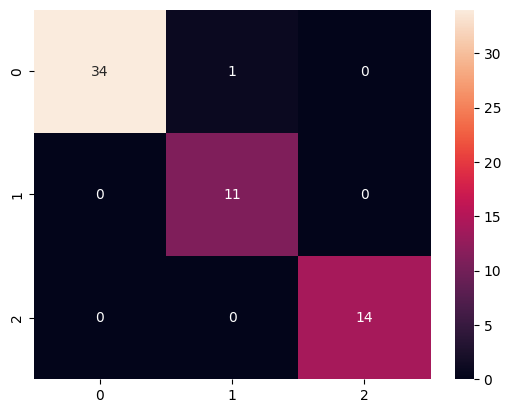

In [108]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf = confusion_matrix(variavel_predicao, modelo_tf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf, annot=True)

In [109]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf[1, 1] / sum(matriz_confusao_tf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_tf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_tf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9714285714285714 

Precisão (Precision):  1.0 

Especificidade (Specificity):  1.0 

F1 Macro:  0.9806763285024154 

F1 Micro:  0.9833333333333333


### IDF

In [110]:
dados_treino_idf = dados_treino_idf.replace(np.nan, 0)

variaveis_preditoras = dados_treino_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values

variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
modelo_idf = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
modelo_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_regressao_logistica = modelo_idf.predict(variaveis_preditoras)

/tmp/ipykernel_4496/482105000.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  variaveis_preditoras = dados_treino_idf.drop(['Cluster'], axis=1).values
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_idf)
print('\nMédia dos resultados:', np.mean(resultado_idf))
print('\nPredições feitas:\n', predicao_regressao_logistica)

Resultados do modelo:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Média dos resultados: 1.0

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative']


/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Matriz de confusão:


<AxesSubplot: >

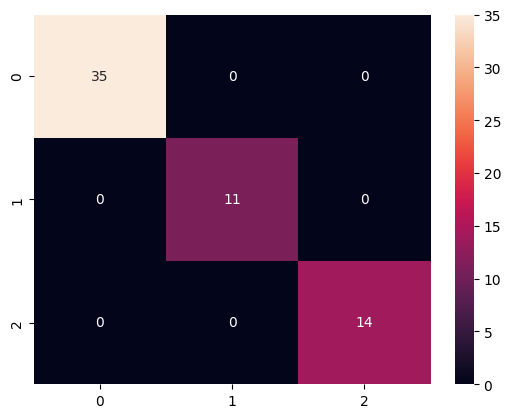

In [112]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_idf, annot=True)

In [113]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_idf[1, 1] / sum(matriz_confusao_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  1.0 

Precisão (Precision):  1.0 

Especificidade (Specificity):  1.0 

F1 Macro:  1.0 

F1 Micro:  1.0


### TF-IDF

In [114]:
variaveis_preditoras = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values

variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo de Regressão Logística:
modelo_tf_idf = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
modelo_tf_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_regressao_logistica = modelo_tf_idf.predict(variaveis_preditoras)

/tmp/ipykernel_4496/2456444440.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  variaveis_preditoras = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf_idf)
print('\nMédia dos resultados:', np.mean(resultado_tf_idf))
print('\nPredições feitas:\n', predicao_regressao_logistica)

Resultados do modelo:
 [0.5 1.  1.  1.  1.  1.  1.  1.  1.  1. ]

Média dos resultados: 0.95

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative']


/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Matriz de confusão:


<AxesSubplot: >

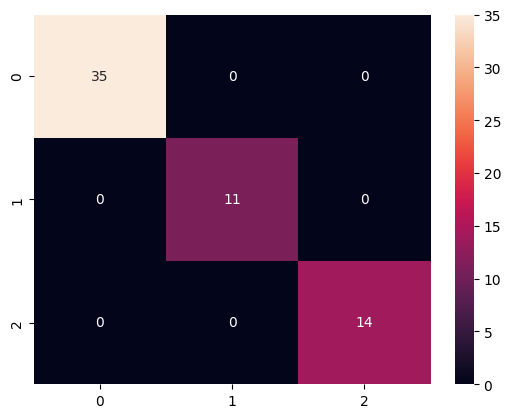

In [116]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf_idf, annot=True)

In [117]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf_idf[1, 1] / sum(matriz_confusao_tf_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  1.0 

Precisão (Precision):  1.0 

Especificidade (Specificity):  1.0 

F1 Macro:  1.0 

F1 Micro:  1.0


## Modelo Naive Bayes

### TF

In [118]:
# Separação dos dados para teste e treino:
variaveis_preditoras = dados_treino_tf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo Naive Bayes:
modelo_tf = MultinomialNB(alpha=0.01, fit_prior=True)
modelo_tf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_naive_bayes = modelo_tf.predict(variaveis_preditoras)

# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf)
print('\nMédia dos resultados:', np.mean(resultado_tf))
print('\nPredições feitas:\n', predicao_naive_bayes)

Resultados do modelo:
 [0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1. ]

Média dos resultados: 0.9

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'neutral' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'neutral' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'neutral' 'negative' 'negative' 'neutral']


/tmp/ipykernel_4496/2623581992.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  variaveis_preditoras = dados_treino_tf.drop(['Cluster'], axis=1).values
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using

Matriz de confusão:


<AxesSubplot: >

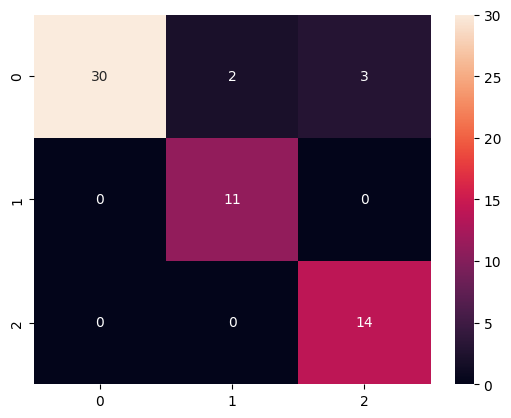

In [119]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf, annot=True)

In [120]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf[0, 0] / sum(matriz_confusao_tf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf[1, 1] / sum(matriz_confusao_tf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.8571428571428571 

Precisão (Precision):  1.0 

Especificidade (Specificity):  1.0 

F1 Macro:  0.9143231320650674 

F1 Micro:  0.9166666666666666


### IDF

In [121]:
dados_treino_idf = dados_treino_idf.replace(np.nan, 0)

# Separação dos dados para teste e treino:
variaveis_preditoras = dados_treino_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo Naive Bayes:
modelo_idf = MultinomialNB(alpha=0.01, fit_prior=True)
modelo_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_naive_bayes = modelo_idf.predict(variaveis_preditoras)

# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_idf)
print('\nMédia dos resultados:', np.mean(resultado_idf))
print('\nPredições feitas:\n', predicao_naive_bayes)

Resultados do modelo:
 [0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1. ]

Média dos resultados: 0.9

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'neutral' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative']


/tmp/ipykernel_4496/1919861723.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  variaveis_preditoras = dados_treino_idf.drop(['Cluster'], axis=1).values
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Matriz de confusão:


<AxesSubplot: >

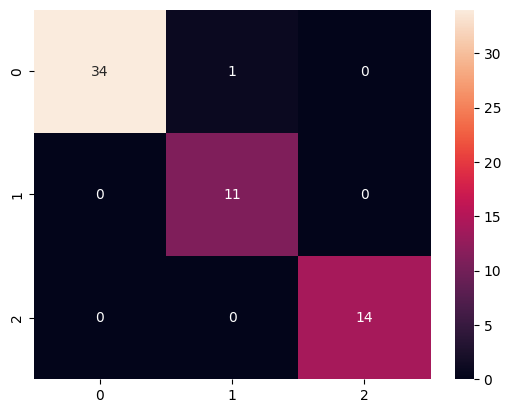

In [122]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_idf, annot=True)

In [123]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_idf[0, 0] / sum(matriz_confusao_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_idf[1, 1] / sum(matriz_confusao_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9714285714285714 

Precisão (Precision):  1.0 

Especificidade (Specificity):  1.0 

F1 Macro:  0.9806763285024154 

F1 Micro:  0.9833333333333333


### TF-IDF

In [124]:
# Separação dos dados para teste e treino:
variaveis_preditoras = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
variavel_predicao = dados_treino_tf['Cluster'].values
variaveis_preditoras_treino, variaveis_preditoras_teste, variavel_predicao_treino, variavel_predicao_teste = train_test_split(variaveis_preditoras, variavel_predicao, test_size = 0.3, random_state = 4)

# Criação e treino do modelo Naive Bayes:
modelo_tf_idf = MultinomialNB(alpha=0.01, fit_prior=True)
modelo_tf_idf.fit(variaveis_preditoras_treino, variavel_predicao_treino)
predicao_naive_bayes = modelo_tf_idf.predict(variaveis_preditoras)

# Aplicação da validação cruzada K-Fold:
validacao_kfold = KFold(10)
resultado_tf_idf = cross_val_score(modelo_idf, variaveis_preditoras_teste, variavel_predicao_teste, cv = validacao_kfold)

# Exibição dos resultados da validação:
print('Resultados do modelo:\n', resultado_tf_idf)
print('\nMédia dos resultados:', np.mean(resultado_tf_idf))
print('\nPredições feitas:\n', predicao_naive_bayes)

Resultados do modelo:
 [0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1. ]

Média dos resultados: 0.9

Predições feitas:
 ['negative' 'negative' 'negative' 'negative' 'neutral' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'neutral' 'negative' 'negative' 'negative']


/tmp/ipykernel_4496/283532315.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  variaveis_preditoras = dados_treino_tf_idf.drop(['Cluster'], axis=1).values
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/barbomat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Matriz de confusão:


<AxesSubplot: >

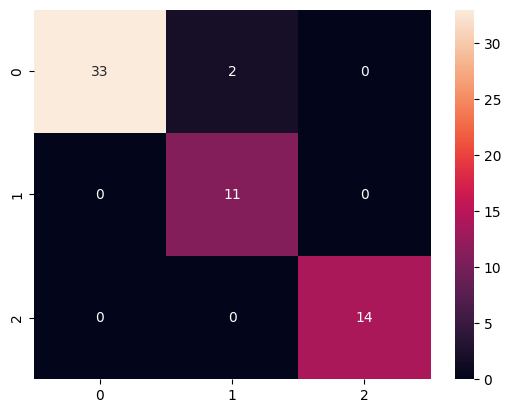

In [125]:
# Criação da matriz de confusão:
print('Matriz de confusão:')
matriz_confusao_tf_idf = confusion_matrix(variavel_predicao, modelo_idf.predict(variaveis_preditoras))
sn.heatmap(matriz_confusao_tf_idf, annot=True)

In [126]:
# Exibição das métricas de avaliação do modelo:
print('Revocação (Recall): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[0, :]), '\n')
print('Precisão (Precision): ', matriz_confusao_tf_idf[0, 0] / sum(matriz_confusao_tf_idf[:, 0]), '\n')
print('Especificidade (Specificity): ', matriz_confusao_tf_idf[1, 1] / sum(matriz_confusao_tf_idf[1, :]), '\n')
print('F1 Macro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='macro'), '\n')
print('F1 Micro: ', f1_score(variavel_predicao, modelo_idf.predict(variaveis_preditoras), average='micro'))

Revocação (Recall):  0.9428571428571428 

Precisão (Precision):  1.0 

Especificidade (Specificity):  1.0 

F1 Macro:  0.9624183006535948 

F1 Micro:  0.9666666666666667
